In [44]:
import pandas as pd
import numpy as np
import networkx as nx

In [49]:
df = pd.read_csv("IFN-gamma_pathway.txt",sep='\t',header=None)
df.columns = ['Prt_1', 'Relation', 'Prt_2']
df

,Prt_1,Relation,Prt_2
0,AKT1,controls-phosphorylation-of,MTOR
1,AKT1,controls-state-change-of,MTOR
2,CALM1,in-complex-with,CAMK2A
3,CALM1,in-complex-with,CAMK2B
4,CALM1,in-complex-with,CAMK2D
...,...,...,...
206,STAT1,controls-state-change-of,MAPK1
207,STAT1,controls-phosphorylation-of,MAPK3
208,STAT1,controls-state-change-of,MAPK3
209,STAT1,controls-expression-of,SMAD7


In [50]:
df['Relation'].value_counts()

controls-state-change-of          89
controls-phosphorylation-of       41
in-complex-with                   40
chemical-affects                  16
controls-expression-of            13
controls-transport-of-chemical     8
controls-transport-of              4
Name: Relation, dtype: int64

In [51]:
relations = {'controls-phosphorylation-of':'increase','controls-state-change-of':'decrease', 
             'in-complex-with':'increase'}

In [52]:
for i in relations:
    df.replace(i,relations[i],inplace=True)

In [53]:
new_df = df.loc[df['Relation'].isin(relations.values())]
new_df

,Prt_1,Relation,Prt_2
0,AKT1,increase,MTOR
1,AKT1,decrease,MTOR
2,CALM1,increase,CAMK2A
3,CALM1,increase,CAMK2B
4,CALM1,increase,CAMK2D
...,...,...,...
202,RAPGEF1,decrease,RAP1B
205,STAT1,increase,MAPK1
206,STAT1,decrease,MAPK1
207,STAT1,increase,MAPK3


<h3>Network

In [54]:
DG = nx.DiGraph()
DG.add_nodes_from(new_df['Prt_1'])
DG.add_nodes_from(new_df['Prt_2'])
for _,row in new_df.iterrows():
    DG.add_edge(row['Prt_1'], row['Prt_2'], **{"Relation":row['Relation']})

In [55]:
edges = [
    data["Relation"]
    for source,target,data in DG.edges(data=True)
    if "Relation" in data
]

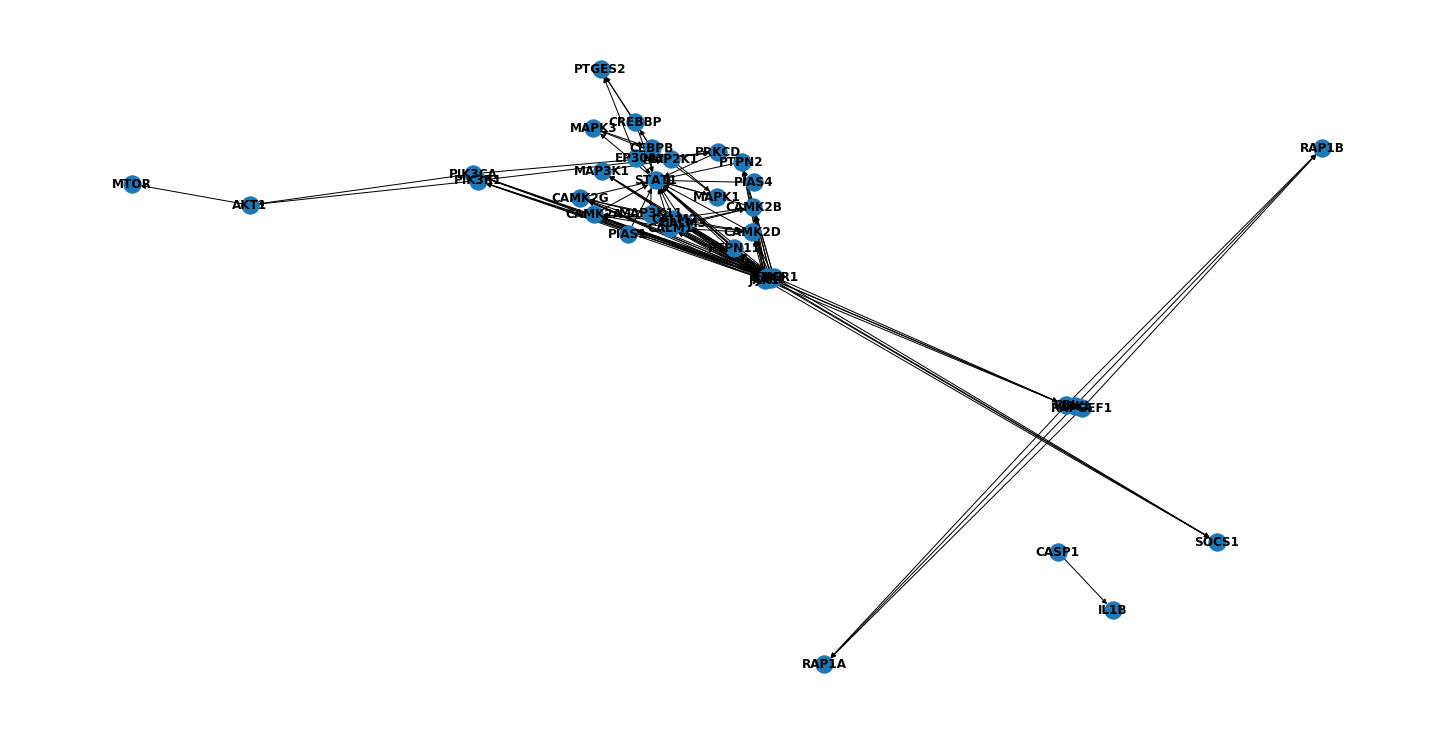

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
nx.draw(DG, with_labels=True, font_weight='bold')
plt.show()

In [58]:
nx.write_graphml(DG, "test.graphml")